<a href="https://colab.research.google.com/github/Juanjo-k/Corte_3_Prediccion/blob/main/RegresionLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: carga el siguiente archivo de excel "/content/drive/MyDrive/Estadistica industrial/tercer corte/datos_regresion_simple.xlsx"

import pandas as pd

# Ruta al archivo Excel
file_path = "/content/drive/MyDrive/Estadistica industrial/tercer corte/datos_regresion_simple.xlsx"

# Cargar el archivo Excel en un DataFrame de pandas
try:
  df = pd.read_excel(file_path)
  print("Archivo cargado exitosamente.")
  # Mostrar las primeras filas del DataFrame para verificar
  print(df.head())
except FileNotFoundError:
  print(f"Error: El archivo '{file_path}' no se encontró.")
except Exception as e:
  print(f"Ocurrió un error al cargar el archivo: {e}")


Archivo cargado exitosamente.
   Semana  Horas_Trabajadas  Horas_Descanso  Productos_Terminados
0       1                42               2             28.925481
1       2                45               3             30.570058
2       3                30               2             21.132880
3       4                33               2             21.798530
4       5                33               3             19.343444


In [ ]:
# prompt: dame un modelo de regresión simple, la variable independiente son Horas_Trabajadas y le dependiente Productos_Terminados

import statsmodels.api as sm

# Suponiendo que 'df' ya está definido y contiene las columnas 'Horas_Trabajadas' y 'Productos_Terminados'

# Definir las variables dependiente e independiente
X = df['Horas_Trabajadas']
y = df['Productos_Terminados']

# Agregar una constante a la variable independiente (intercepto)
X = sm.add_constant(X)

# Crear el modelo de regresión lineal
model = sm.OLS(y, X)

# Ajustar el modelo a los datos
results = model.fit()

# Imprimir los resultados del modelo
print(results.summary())


                             OLS Regression Results                             
Dep. Variable:     Productos_Terminados   R-squared:                       0.790
Model:                              OLS   Adj. R-squared:                  0.786
Method:                   Least Squares   F-statistic:                     180.9
Date:                  Tue, 13 May 2025   Prob (F-statistic):           6.72e-18
Time:                          18:06:34   Log-Likelihood:                -98.737
No. Observations:                    50   AIC:                             201.5
Df Residuals:                        48   BIC:                             205.3
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               

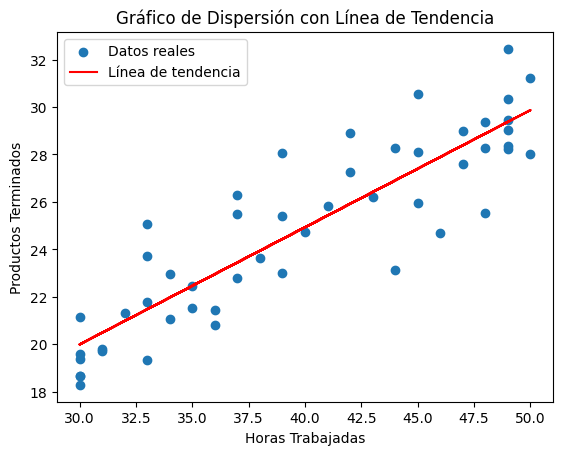

In [ ]:
# prompt: Dame un grafico de dispersion con su linea de tendencia

import matplotlib.pyplot as plt

# Obtener los valores predichos por el modelo
y_pred = results.predict(X)

# Crear el gráfico de dispersión
plt.scatter(X['Horas_Trabajadas'], y, label='Datos reales')
plt.plot(X['Horas_Trabajadas'], y_pred, color='red', label='Línea de tendencia')

# Agregar etiquetas y título al gráfico
plt.xlabel('Horas Trabajadas')
plt.ylabel('Productos Terminados')
plt.title('Gráfico de Dispersión con Línea de Tendencia')
plt.legend()

# Mostrar el gráfico
plt.show()


In [ ]:
# prompt: Dame la ecuacion de la recta

# Obtener los coeficientes de la regresión
intercept = results.params['const']
slope = results.params['Horas_Trabajadas']

# Imprimir la ecuación de la recta
print(f"La ecuación de la recta de regresión es: y = {intercept:.2f} + {slope:.2f}x")


La ecuación de la recta de regresión es: y = 5.17 + 0.49x


In [ ]:
# prompt: Necesito determinar el coeficiente de terminación

# ... (código anterior sin cambios)

# Obtener el coeficiente de determinación (R-cuadrado)
r_squared = results.rsquared

# Imprimir el coeficiente de determinación
print(f"El coeficiente de determinación (R-cuadrado) es: {r_squared:.4f}")


El coeficiente de determinación (R-cuadrado) es: 0.7903


In [ ]:
# prompt: Necesito que generes una predicción para un valor de X de 35 Horas_Trabajadas

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Ruta al archivo Excel
file_path = "/content/drive/MyDrive/Estadistica industrial/tercer corte/datos_regresion_simple.xlsx"

# Cargar el archivo Excel en un DataFrame de pandas
try:
  df = pd.read_excel(file_path)
  print("Archivo cargado exitosamente.")
  # Mostrar las primeras filas del DataFrame para verificar
  print(df.head())
except FileNotFoundError:
  print(f"Error: El archivo '{file_path}' no se encontró.")
except Exception as e:
  print(f"Ocurrió un error al cargar el archivo: {e}")

# Definir las variables dependiente e independiente
X = df['Horas_Trabajadas']
y = df['Productos_Terminados']

# Agregar una constante a la variable independiente (intercepto)
X = sm.add_constant(X)

# Crear el modelo de regresión lineal
model = sm.OLS(y, X)

# Ajustar el modelo a los datos
results = model.fit()

# Predecir para un nuevo valor de X (35 horas trabajadas)
new_x = pd.DataFrame({'const': 1, 'Horas_Trabajadas': [35]})
predicted_y = results.predict(new_x)

print(f"Predicción para 35 horas trabajadas: {predicted_y[0]:.2f} productos terminados")


Archivo cargado exitosamente.
   Semana  Horas_Trabajadas  Horas_Descanso  Productos_Terminados
0       1                42               2             28.925481
1       2                45               3             30.570058
2       3                30               2             21.132880
3       4                33               2             21.798530
4       5                33               3             19.343444
Predicción para 35 horas trabajadas: 22.46 productos terminados
